# S&P 500 Seasonal Exploratory Analysis

This notebook explores whether winter returns differ materially from summer returns within the S&P 500 dataset and visualizes seasonal patterns.


In [4]:
import sys
sys.path.append('../src')

from data_loader import load_sector_data, get_seasonal_returns
from stats_analysis import calculate_statistics, seasonal_ttest
from visualization import plot_seasonal_comparison, plot_monthly_averages

import pandas as pd
import numpy as np

print("✓ Modules loaded!")


✓ Modules loaded!


## Load S&P 500 data

Import the historical monthly return data from Excel so we can slice it into seasonal windows for analysis.


In [5]:
file_path = '../data/Seasonal S&P Data as of 11.13.2025 - Abhi.xlsx'
df_sp500 = load_sector_data(file_path, 'S&P500')
df_sp500 = df_sp500[df_sp500.index > 1994]
df_sp500.head()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1995,2.427766,3.607415,2.732924,2.79603,3.631171,2.127859,3.177604,-0.032025,4.009753,-0.497938,4.104901,1.744388
1996,3.261734,1.372598,0.791656,1.343145,2.285339,0.22567,-4.574803,1.881397,5.417261,2.613086,7.337615,-2.150538
1997,6.131706,0.592755,-4.2614,5.840554,5.857688,4.345263,7.812323,-5.744585,5.315352,-3.447766,4.458682,1.573163
1998,1.015014,7.044926,4.994568,0.907647,-1.882617,3.943822,-1.16154,-14.579671,6.239554,8.02942,5.912603,5.637531
1999,4.100941,-3.228252,3.879418,3.794398,-2.497042,5.443833,-3.20461,-0.625414,-2.855174,6.253947,1.906187,5.784392


## Compute seasonal return summaries

Calculate descriptive statistics for winter (November-April) and summer (May-October) return windows.


In [6]:
winter_returns = get_seasonal_returns(df_sp500, 'winter')
summer_returns = get_seasonal_returns(df_sp500, 'summer')

winter_stats = calculate_statistics(winter_returns)
summer_stats = calculate_statistics(summer_returns)

print("Winter stats:")
print(winter_stats)
print()
print("Summer stats:")
print(summer_stats)


Winter stats:
{'count': 184, 'mean': np.float64(1.1460723150062169), 'median': np.float64(1.4700844038280199), 'std': np.float64(4.254151672450809), 'min': np.float64(-12.5119320835957), 'max': np.float64(12.6844102933154), 'skewness': np.float64(-0.49227303648830584), 'kurtosis': np.float64(0.5614607683216506), 'positive_pct': np.float64(67.3913043478261)}

Summer stats:
{'count': 186, 'mean': np.float64(0.5296780714813147), 'median': np.float64(1.2132404722212948), 'std': np.float64(4.44465538802832), 'min': np.float64(-16.9424534449055), 'max': np.float64(10.7723038305846), 'skewness': np.float64(-0.7281292057824188), 'kurtosis': np.float64(1.2173770785674245), 'positive_pct': np.float64(62.365591397849464)}


## Run statistical test

Use a paired t-test to measure whether the difference between winter and summer returns is statistically significant.


In [7]:
test_results = seasonal_ttest(winter_returns, summer_returns)
print("Paired t-test results:")
print(test_results)


Paired t-test results:
{'t_statistic': np.float64(1.362503456783593), 'p_value': np.float64(0.17387231120486832), 'significant_05': np.False_, 'significant_01': np.False_, 'cohens_d': np.float64(0.1416852858591258), 'mean_difference': np.float64(0.6163942435249021)}


## Visualize seasonal patterns

Plot a direct seasonal comparison as well as the average monthly returns to see when the spread is most pronounced.


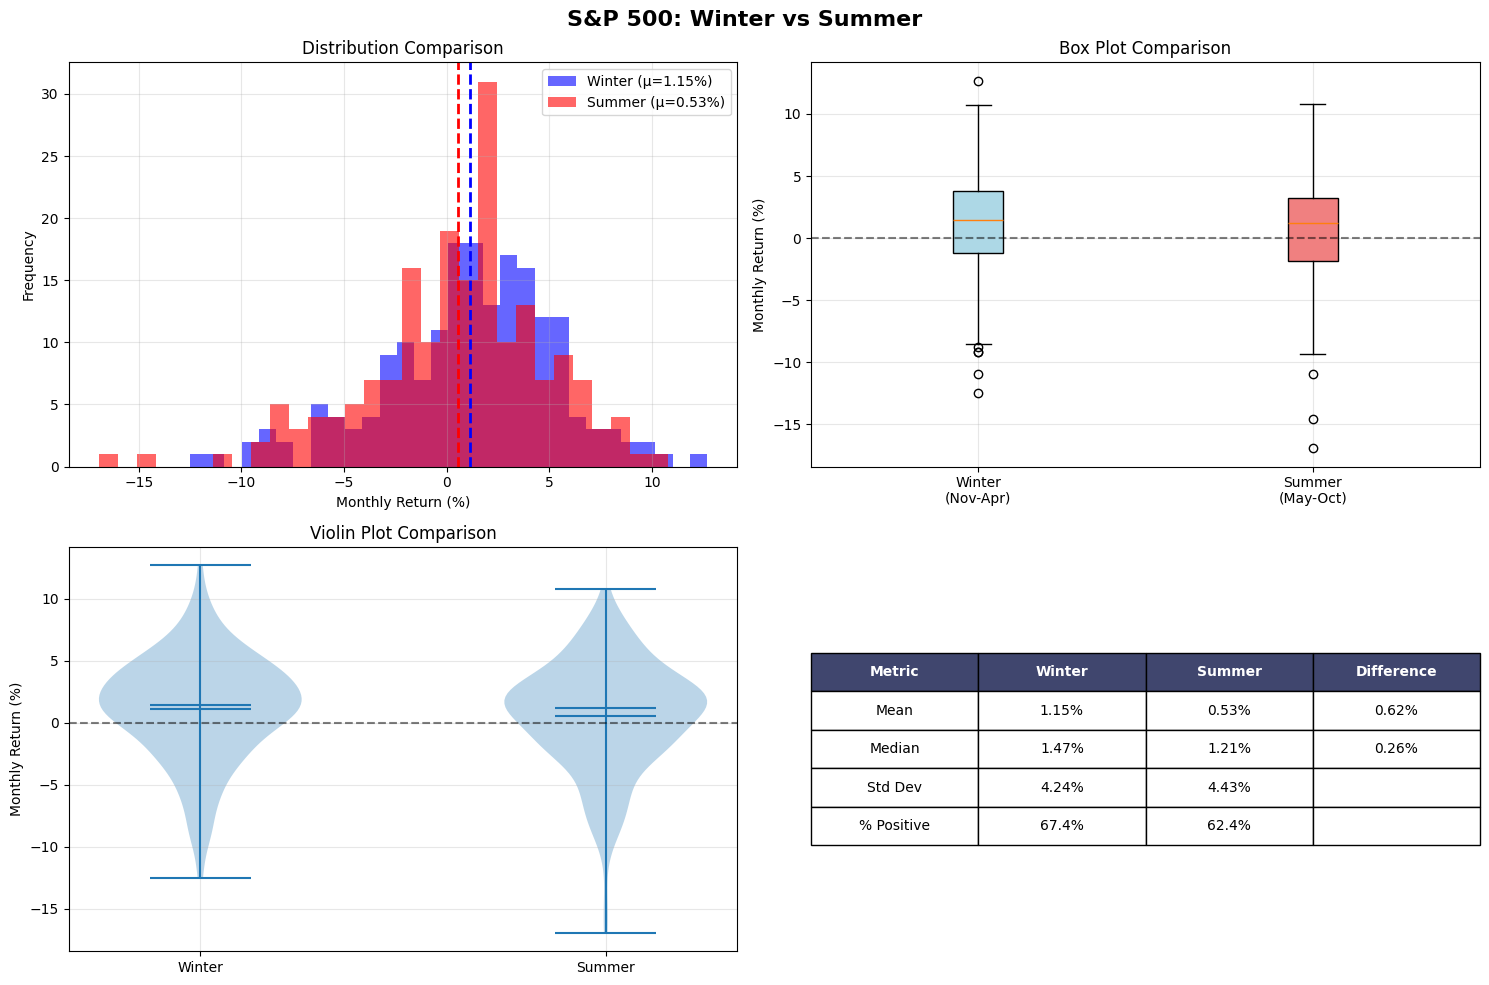

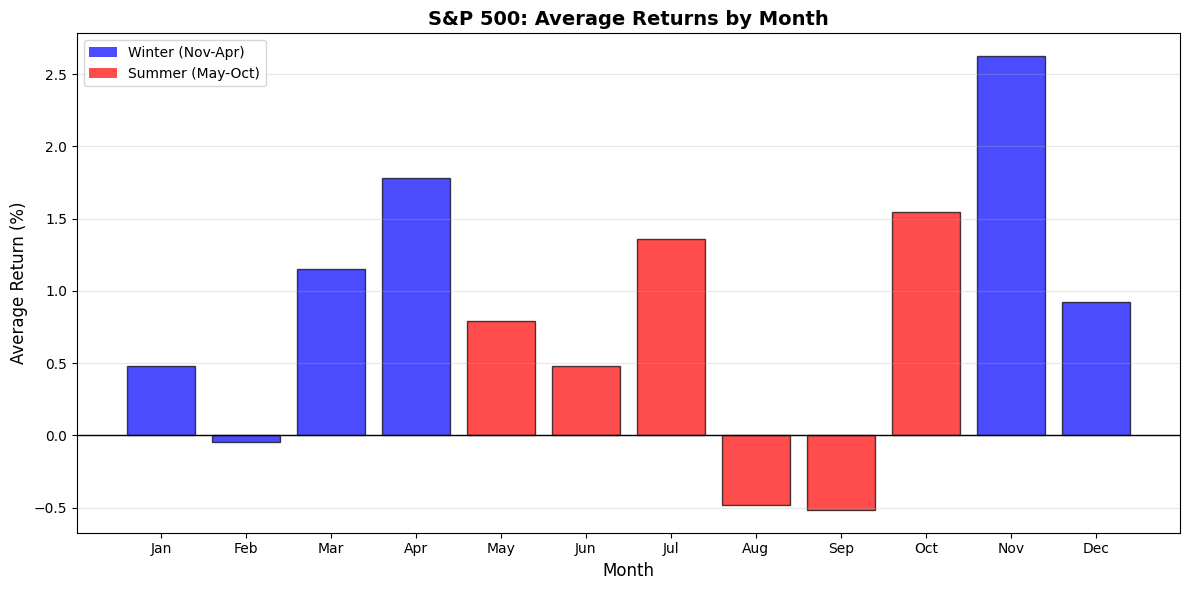

In [8]:
plot_seasonal_comparison(winter_returns, summer_returns, "S&P 500: Winter vs Summer")
plot_monthly_averages(df_sp500, "S&P 500: Average Returns by Month")


## Results & interpretation

Review the descriptive stats, t-test output, and charts above to understand the magnitude and consistency of the winter vs. summer effect. Pay special attention to the p-value and effect size alongside visual differences to decide if the seasonality is practically meaningful for the investment thesis.
